In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode,skew,skewtest

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import StratifiedKFold,train_test_split
from sklearn import linear_model
import xgboost as xgb

In [2]:
data=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/IMDB movie ratings/movie_metadata.csv')

In [3]:
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [4]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [5]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
#Now we will fill the null values.

#Color
data['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [8]:
data=data.fillna(value={'color':'Color'},inplace=True)

In [9]:
#Number of critic for reviews
#For this we will choose the median value of the number of critic values
data=data.fillna(value={'num_critic_for_reviews':data['num_critic_for_reviews'].median()})

#Duration
data=data.fillna(value={'duration':data['duration'].median()})

#Gross
data=data.fillna(value={'gross':data['gross'].mean()})

#Face number in poster
data=data.fillna(value={'facenumber_in_poster':data['facenumber_in_poster'].median()})

#Number of users for review
data=data.fillna(value={'num_user_for_reviews':data['num_user_for_reviews'].median()})

In [10]:
#language

data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64

In [11]:
data=data.fillna(value={'language':data['language'].mode()[0]})

In [12]:
#Country
data=data.fillna(value={'country':data['country'].mode()[0]})

In [13]:
data=data.fillna(value={'content_rating':data['content_rating'].mode()[0]})

In [14]:
#Budget
data=data.fillna(value={'budget':data['budget'].mean()})

In [15]:
#Aspect Ratio

data=data.fillna(value={'aspect_ratio':data['aspect_ratio'].mode()[0]})

In [16]:
data.shape

(5043, 28)

In [17]:
#Director and actor names

data=data.fillna(value={'director_name':data['director_name'].mode()[0]})
data=data.fillna(value={'actor_2_name':data['actor_2_name'].mode()[0]})
data=data.fillna(value={'actor_3_name':data['actor_3_name'].mode()[0]})
data=data.fillna(value={'actor_1_name':data['actor_1_name'].mode()[0]})

In [18]:
data=data.fillna(value={'director_facebook_likes':data['director_facebook_likes'][data['director_name']=='Steven Spielberg'].mode()[0]})
data=data.fillna(value={'actor_1_facebook_likes':data['actor_1_facebook_likes'][data['actor_1_name']=='Robert De Niro'].mode()[0]})
data=data.fillna(value={'actor_2_facebook_likes':data['actor_2_facebook_likes'][data['actor_2_name']=='Morgan Freeman'].mode()[0]})
data=data.fillna(value={'actor_3_facebook_likes':data['actor_3_facebook_likes'][data['actor_3_name']=='Ben Mendelsohn'].mode()[0]})

In [19]:
#Title Year
data=data.fillna(value={'title_year':data['title_year'].mode()[0]})

In [20]:
train=data

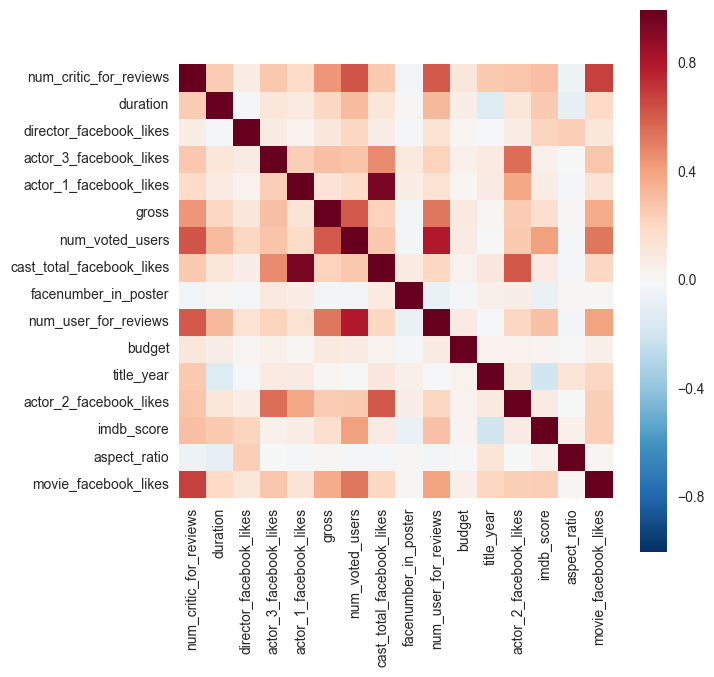

In [21]:
#We first look at the correlation between the features

corr = train.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)

In [22]:
#Since the features are related to each other, we run a random forest to check the feature importances.

forest=RandomForestRegressor(n_estimators=100,n_jobs=-1)
forest.fit(train.drop('imdb_score',1).select_dtypes(include = ['float64', 'int64']),train['imdb_score'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

<Container object of 15 artists>

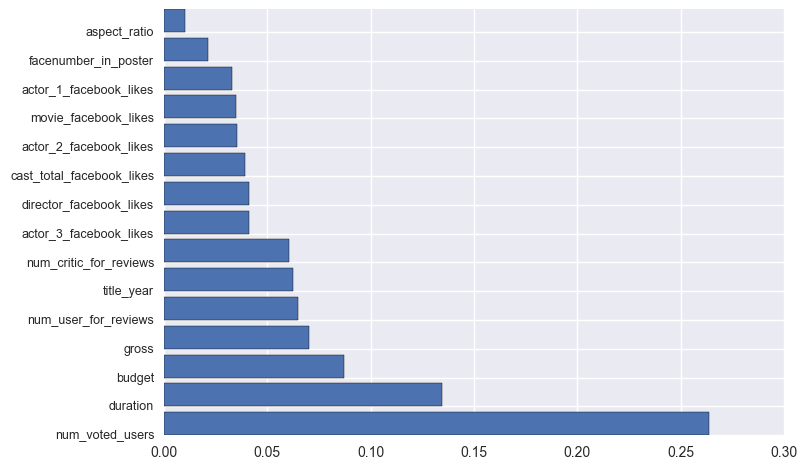

In [23]:
forest=RandomForestRegressor(n_estimators=100,n_jobs=-1)
forest.fit(train.drop('imdb_score',1).select_dtypes(include = ['float64', 'int64']),train['imdb_score'])
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
feature=train.drop('imdb_score',1).select_dtypes(include = ['float64', 'int64'])
plt.yticks(range(len(indices)),feature[indices],fontsize=9)
plt.barh(range(len(indices)),importances[indices])

In [24]:
#We look at the features one by one and see their relation with the score.

train.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [25]:
#Num_voted_users

train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.894904,107.188578,961.068610,645.479477,6581.478683,4.846841e+07,8.366816e+04,9699.063851,1.370216,272.284553,3.975262e+07,2002.610351,1675.852667,6.442138,2.228858,7525.964505
std,121.034214,25.160972,3366.338095,1661.254189,15021.333920,6.216318e+07,1.384853e+05,18163.799124,2.011066,377.269873,1.958004e+08,12.376429,4064.962256,1.125116,1.339542,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,134.500000,615.500000,8.460992e+06,8.593500e+03,1411.000000,0.000000,65.000000,7.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,52.000000,374.000000,989.000000,3.743230e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.300000e+07,2006.000000,596.000000,6.600000,2.350000,166.000000
75%,194.000000,118.000000,218.000000,638.000000,11000.000000,5.135707e+07,9.630900e+04,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,919.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


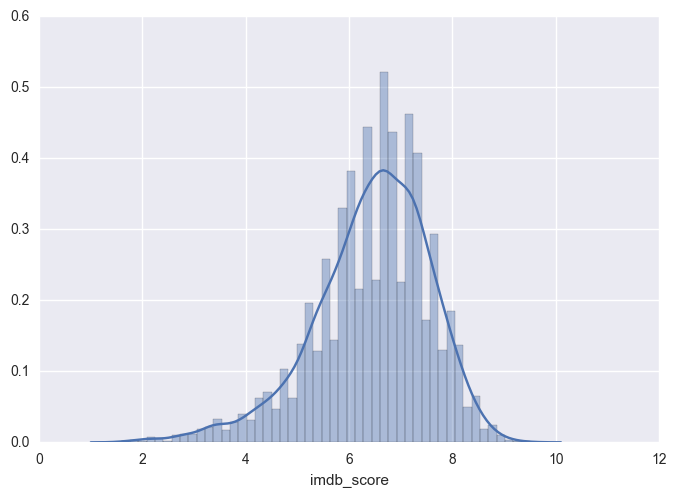

In [26]:
#We now do visualisation to check how some features affect the imdb score.

sns.distplot(train['imdb_score'])

In [27]:
train.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

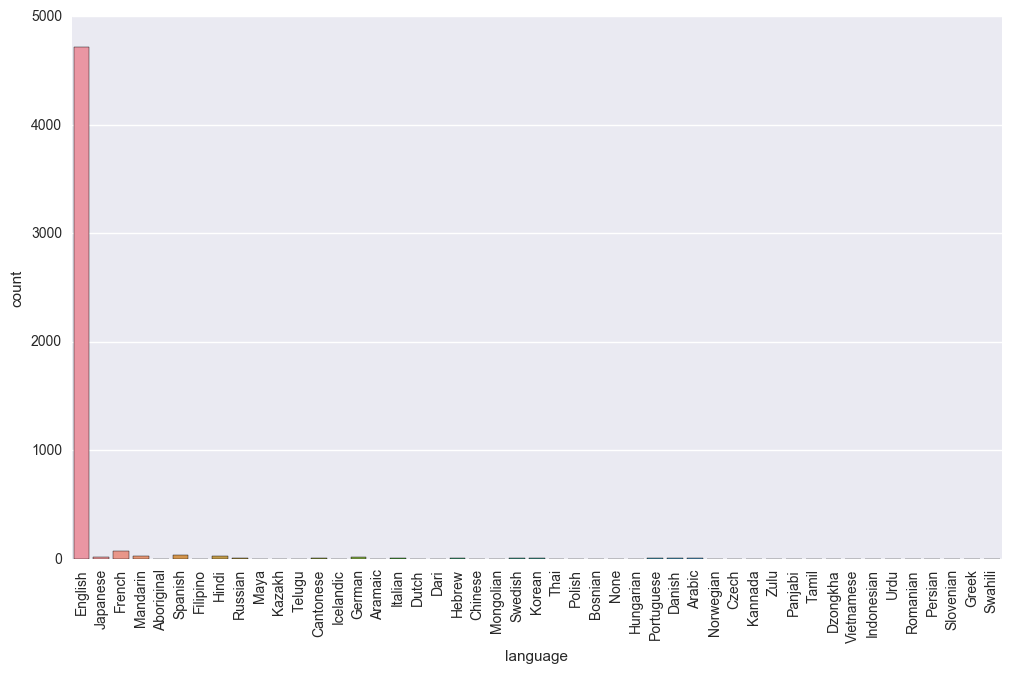

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize = (12, 7))
sns.countplot(x="language", data = data)
ax = plt.xticks(rotation=90)

In [29]:
#We see that majority of movies in the database are in English. Now we look at how the director facebook likes and 
#other facebook likes influence the IMDB score.Let us bin the imdb scores to get a picture of the data and features.

bins=[1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0]
group_labels=['very very bad','very bad','bad','average','good','excellent','fantabulous']
train['movie_categories']=pd.cut(train['imdb_score'], bins, labels=group_labels)

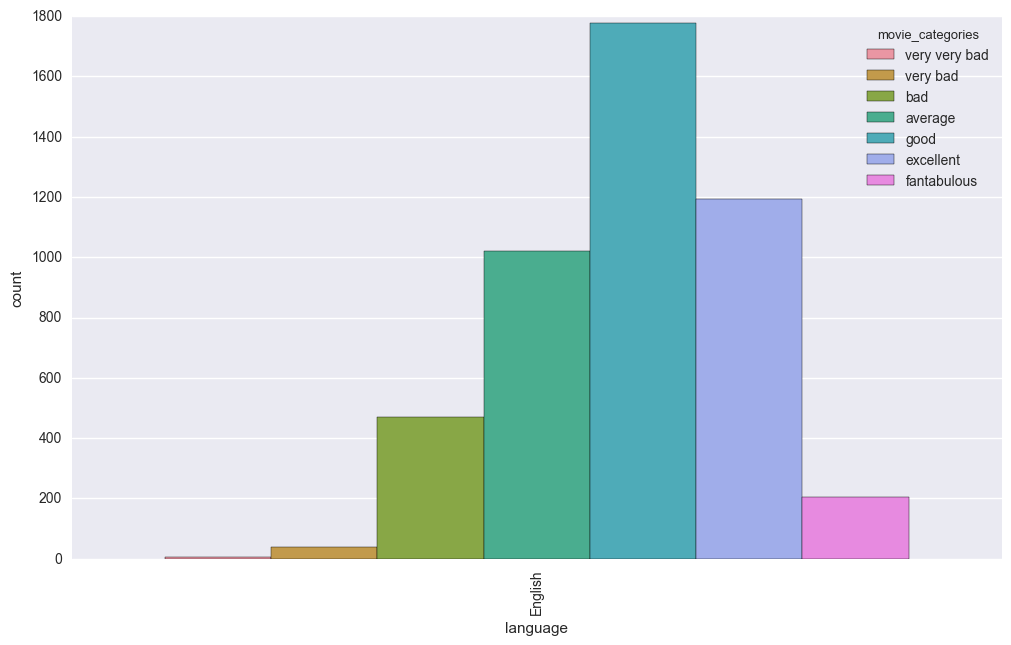

In [30]:
#Now we look how the various features have effects on the score
#Language

sns.set(style="darkgrid")
plt.figure(figsize = (12, 7))
sns.countplot(x=train['language'][train['language']=='English'], data = train,hue='movie_categories')
ax = plt.xticks(rotation=90)

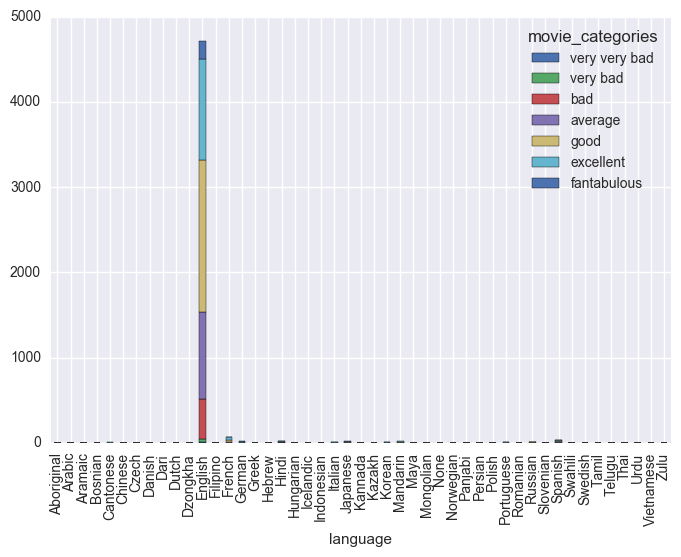

In [31]:
#We see that most of the movies are English and most of them are in the category of good followed by average.Only a few
#are very very bad. So lets see which language movies have very bad ratings

pd.crosstab(train['language'],train['movie_categories']).plot(kind='bar',stacked=True)

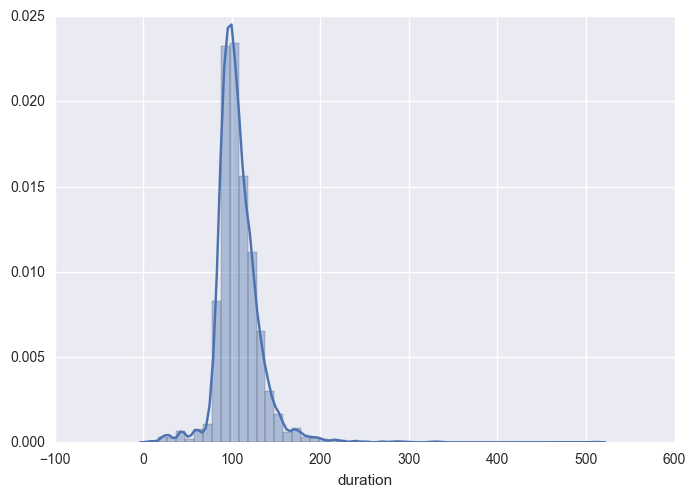

In [32]:
#Now we look at duration

sns.distplot(train['duration'])

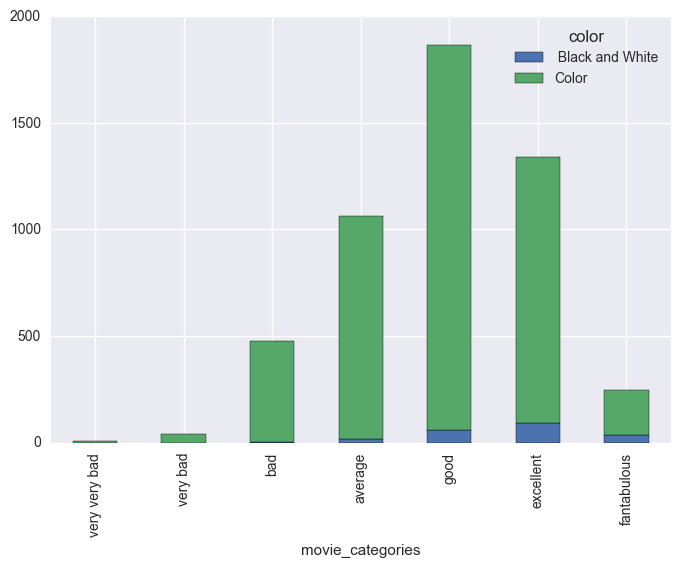

In [33]:
#Color

pd.crosstab(train['movie_categories'],train['color']).plot(kind='bar',stacked=True)

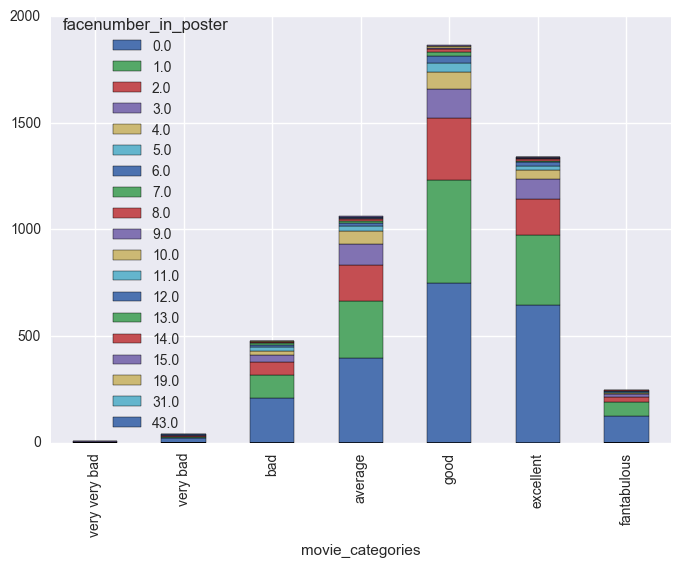

In [34]:
#We see that there are very few black and white films but the important point is that they are mostly above average which
#is good.

#Face number in poster

pd.crosstab(train['movie_categories'],train['facenumber_in_poster'],).plot(kind='bar',stacked=True)

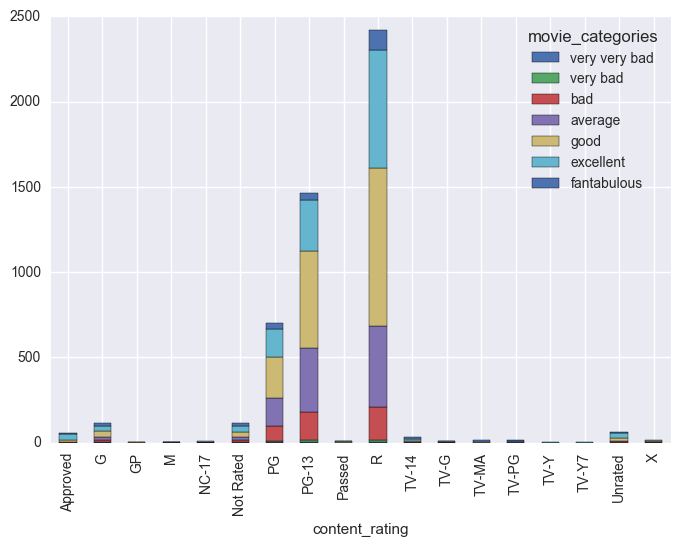

In [35]:
#Lets see now how the content ratings have been distributed and how they affect the score

pd.crosstab(train['content_rating'],train['movie_categories']).plot(kind='bar',stacked=True)

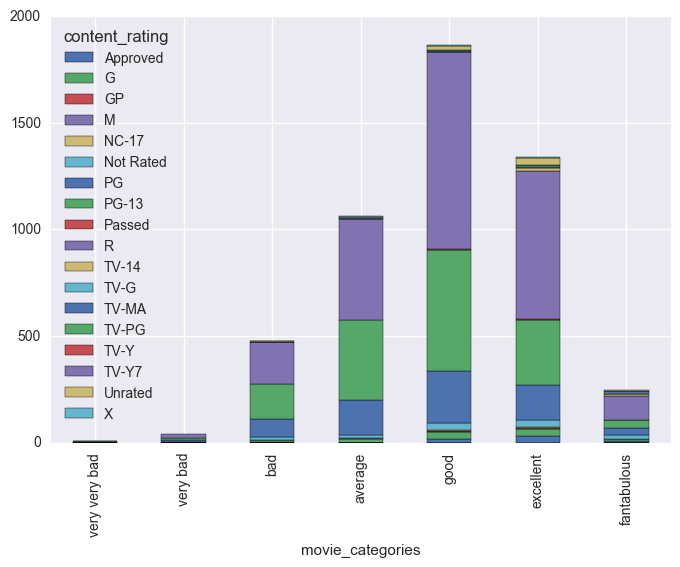

In [36]:
#We see that most of the movies in the database are R rated followed by PG and PG-13. Now lets see how each category 
#of movie has the ratings distributed by

pd.crosstab(train['movie_categories'],train['content_rating']).plot(kind='bar',stacked=True)

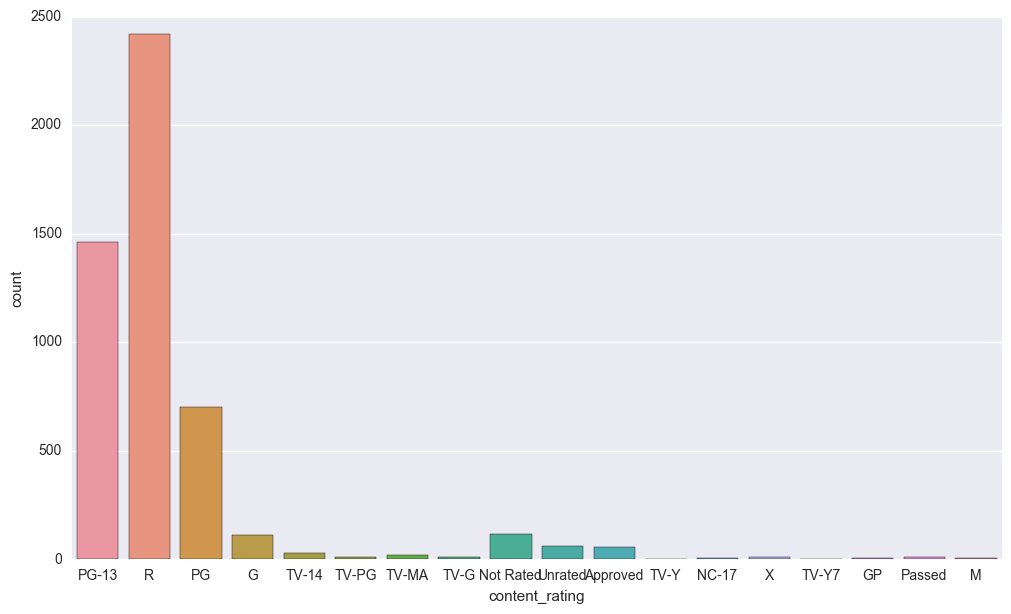

In [37]:
#We see that most of the movies are in the PG-13 and R ratings section. Now lets bring in the gross budgets of the movies.
sns.set(style="darkgrid")
plt.figure(figsize = (12, 7))
sns.countplot('content_rating',data=train)

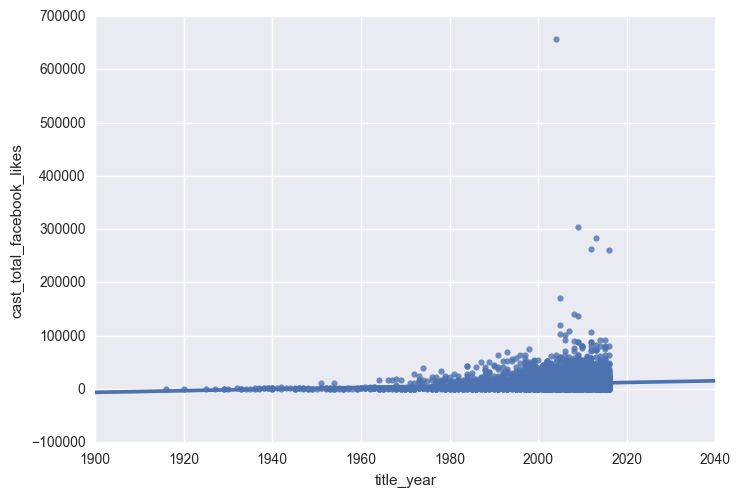

In [38]:
#Now lets analyze the facebook likes and the year

sns.regplot(data=train,x='title_year',y='cast_total_facebook_likes')

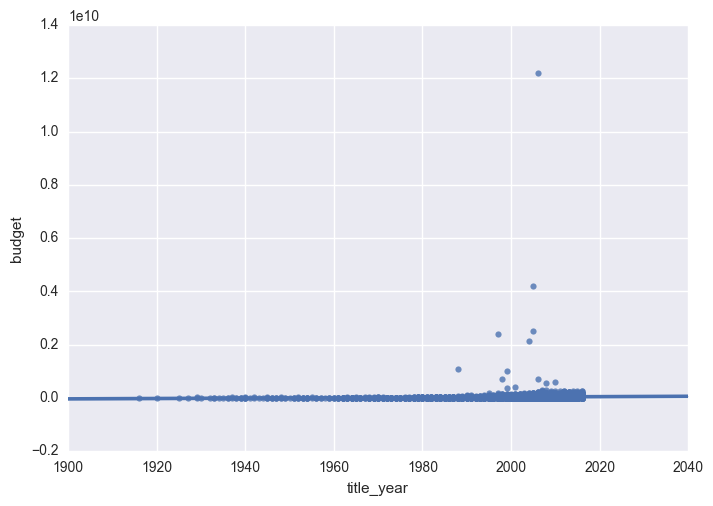

In [39]:
#We see that with increasing year the number of likes have also increased. Thus newer movies have tend to have more likes
#Now lets see how the budget has changed with year

sns.regplot(data=train,x='title_year',y='budget')

In [40]:
#We see that the budgets have not increased or decreased. They have almost remained constant with time. Lets add a new
#feature profit to out features list

train['profit']=train['gross']-train['budget']
#test['profit']=test['gross']-test['budget']

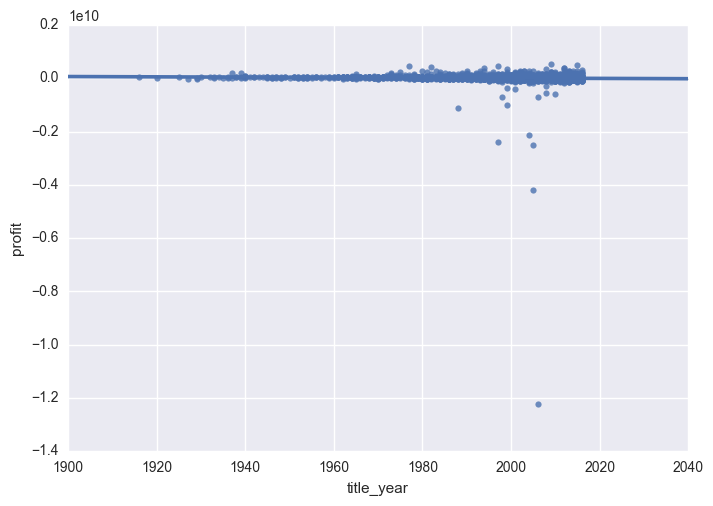

In [41]:
#Lets see the distribution of profit with year and budget

sns.regplot(data=train,y='profit',x='title_year')

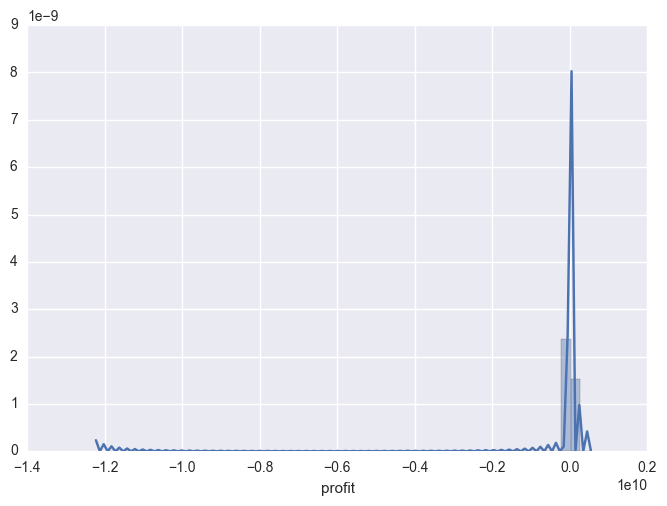

In [42]:
#We see that the profits have infact decreased with year. Lets plot the histogram of profit

sns.distplot(train['profit'])

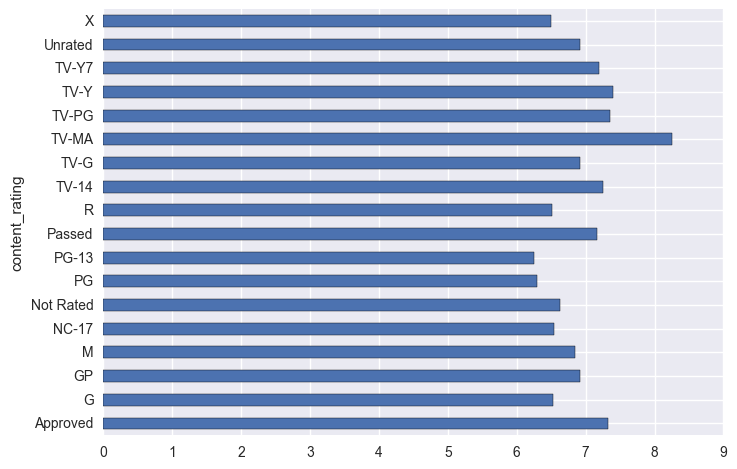

In [43]:
data_groupby_rating = data.groupby(['content_rating'])['imdb_score'].mean()
#plt.style.use('ggplot')
data_groupby_rating.plot(kind='barh')
#type(list(data_groupby_rating.index))

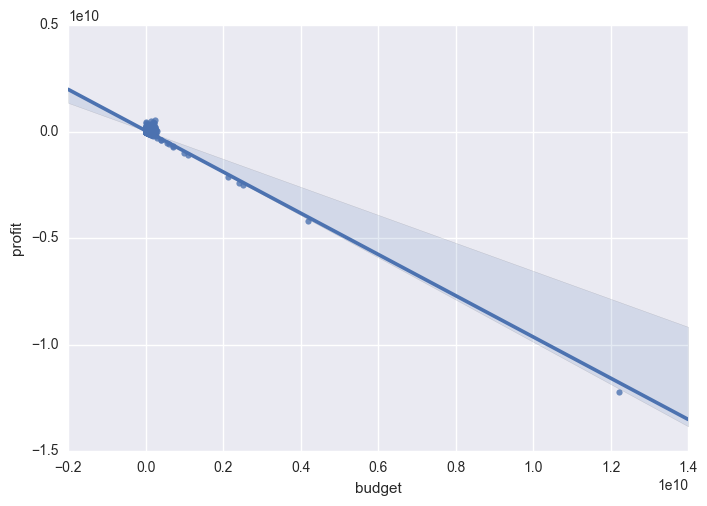

In [44]:
#Budget vs Profit

sns.regplot(data=train,x='budget',y='profit')

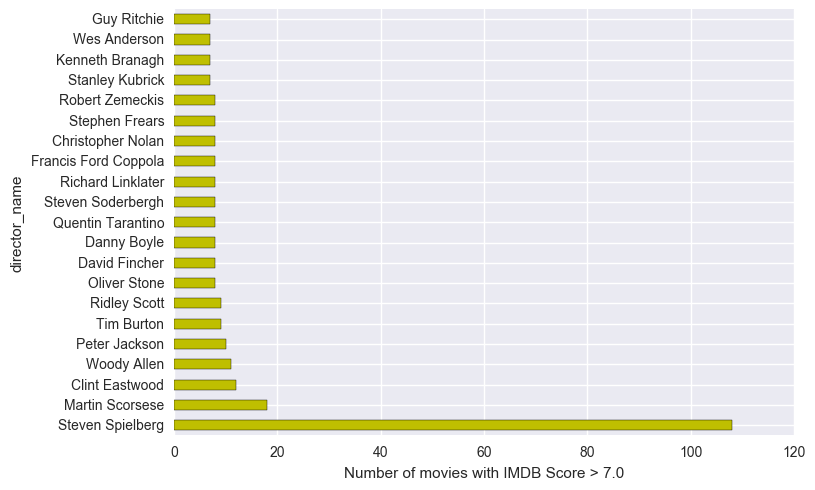

In [45]:
#Lets group the data by the number of movies with ratings greater than 7.0 for each director and see which directors have
#maximum movies with high ratings

data_groupby_directors=train[train['imdb_score']>=7.0].groupby(['director_name'])['imdb_score'].count()
top_20_directors=data_groupby_directors.sort_values(ascending=False)[0:21]
top_20_directors.plot(kind='barh',color='y')
plt.xlabel('Number of movies with IMDB Score > 7.0')

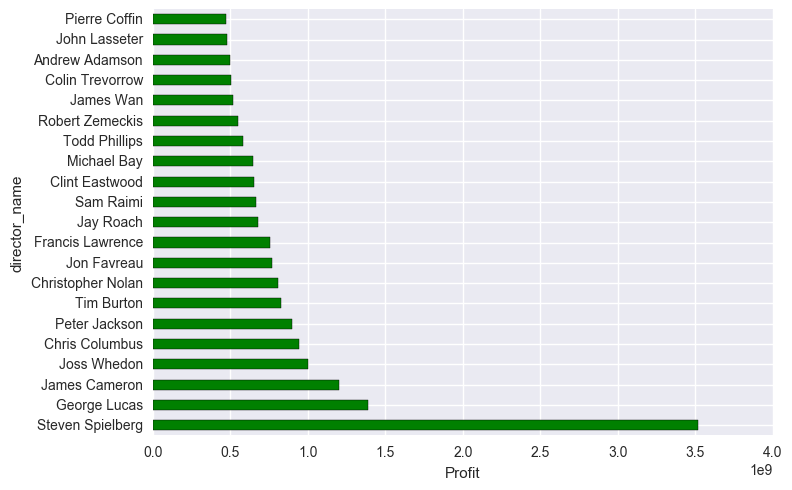

In [46]:
#Clearly Steven Speilberg has the highest number of movies with rating greater than 7.0. Now lets see which director
#has made the highest profit

data_groupby_directors2=train.groupby(['director_name'])['profit'].sum()
most_profitable_directors=data_groupby_directors2.sort_values(ascending=False)[0:21]
most_profitable_directors.plot(kind='barh',color='g')
plt.xlabel('Profit')

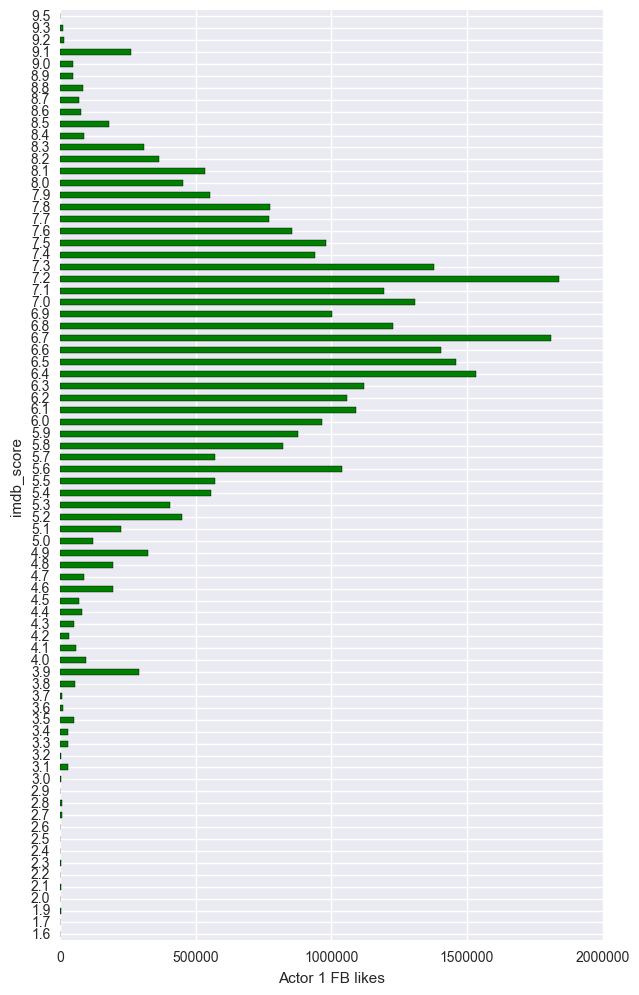

In [47]:
#Does the Number of likes affect the imdb score?

data_groupby_likes=data.groupby(['imdb_score'])['actor_1_facebook_likes'].sum()
plt.figure(figsize = (7,12))
data_groupby_likes.plot(kind='barh',color='g')
plt.xlabel('Actor 1 FB likes')

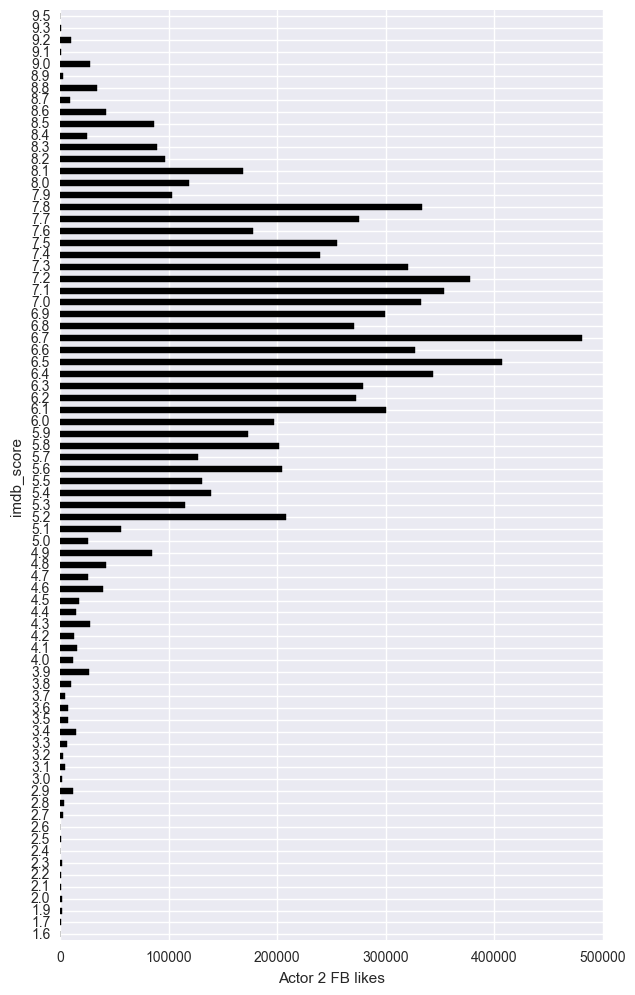

In [48]:
data_groupby_likes=data.groupby(['imdb_score'])['actor_2_facebook_likes'].sum()
plt.figure(figsize = (7,12))
data_groupby_likes.plot(kind='barh',color='k')
plt.xlabel('Actor 2 FB likes')

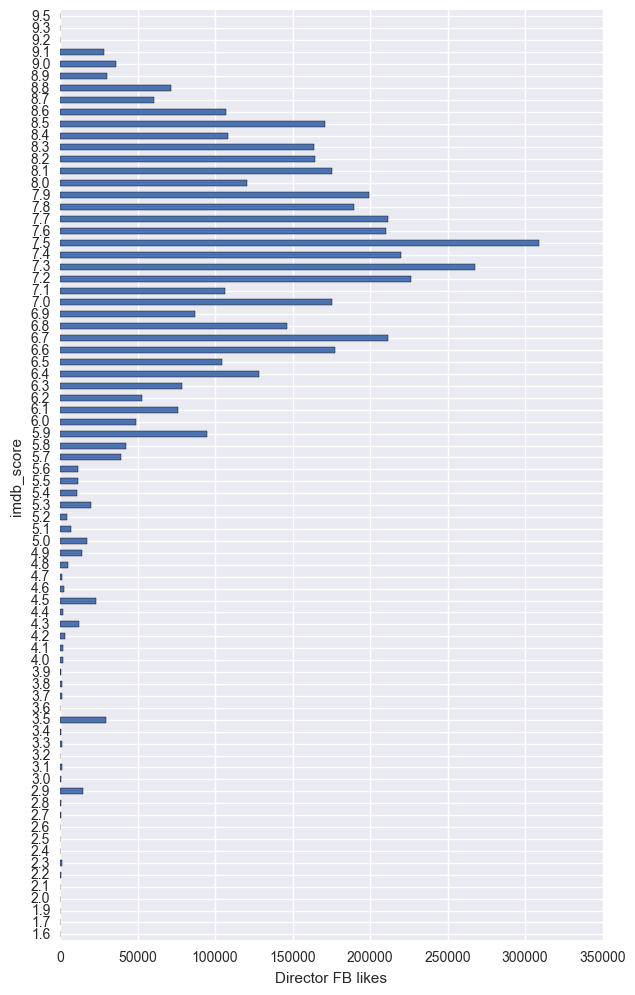

In [49]:
data_groupby_likes=data.groupby(['imdb_score'])['director_facebook_likes'].sum()
plt.figure(figsize = (7,12))
data_groupby_likes.plot(kind='barh')
plt.xlabel('Director FB likes')

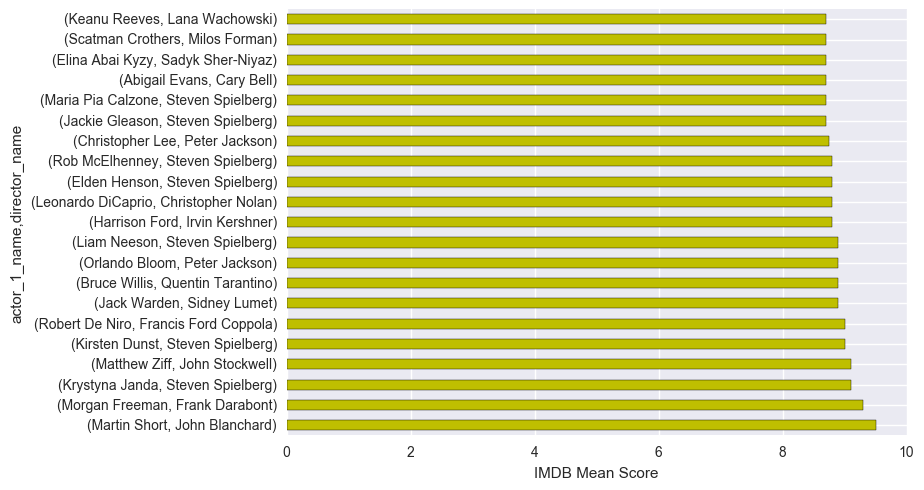

In [50]:
#We see that the number of likes increases with increasing IMDB score. Now we look at how the actor-director pairs
#are affected by IMDB score.

data_groupby1=train.groupby(['actor_1_name','director_name'])['imdb_score'].mean()
data_groupby1.sort_values(ascending=False)[0:21].plot(kind='barh',color='y')
plt.xlabel('IMDB Mean Score')

In [51]:
#We create a new feature - return on investment

train['return_on_investment']=(train['profit']/train['budget'])*100
#test['return_on_investment']=(test['profit']/test['budget'])*100

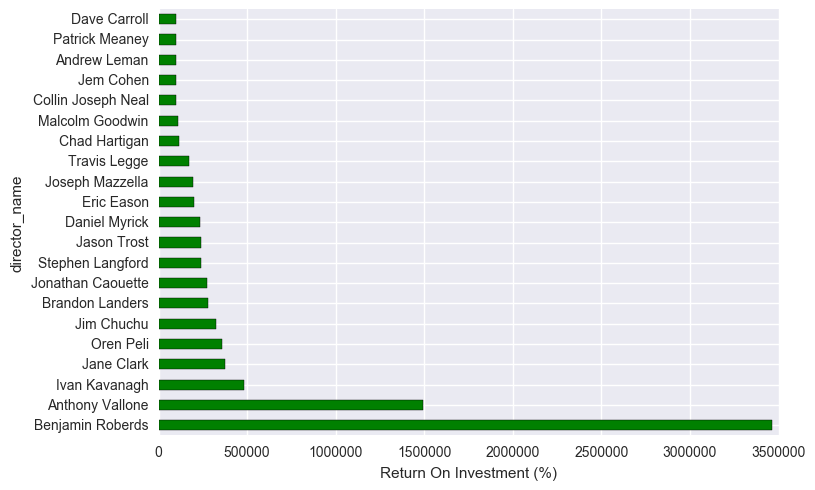

In [52]:
#Now lets see how much each director's return on investment is and who got the highest return on investment.

data_groupby3=train.groupby(['director_name'])['return_on_investment'].mean()
most_profitable_directors2=data_groupby3.sort_values(ascending=False)[0:21]
most_profitable_directors2.plot(kind='barh',color='g')
plt.xlabel('Return On Investment (%)')

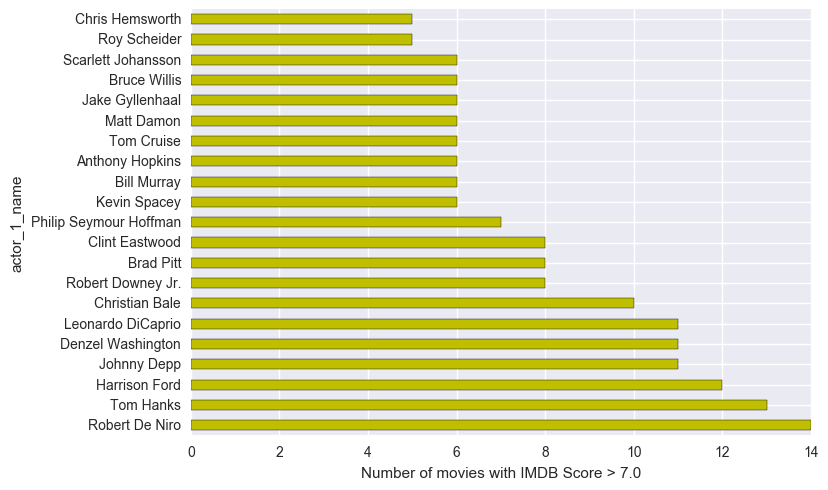

In [53]:
#We see that Benjamin Roberds had the highest return on his investment followed by the other directors shown in the 
#figure.Now lets examine which top 20 actors had the most amount of movies with higher rating.

data_groupby4=train[train['imdb_score']>=7.5].groupby(['actor_1_name'])['imdb_score'].count()
data_groupby4.sort_values(ascending=False)[0:21].plot(kind='barh',color='y')
plt.xlabel('Number of movies with IMDB Score > 7.0')

In [54]:
#Now we have got a pretty good idea about the data. Lets look at the genre and what is the relation with imdb score.
genre={}
def count_genre(x): 
    for i in x:
        if i in genre:
            genre[i]+=1
        else:
            genre[i]=1
        
x=train['genres'].apply(lambda x:x.split('|')).apply(lambda x:count_genre(x))

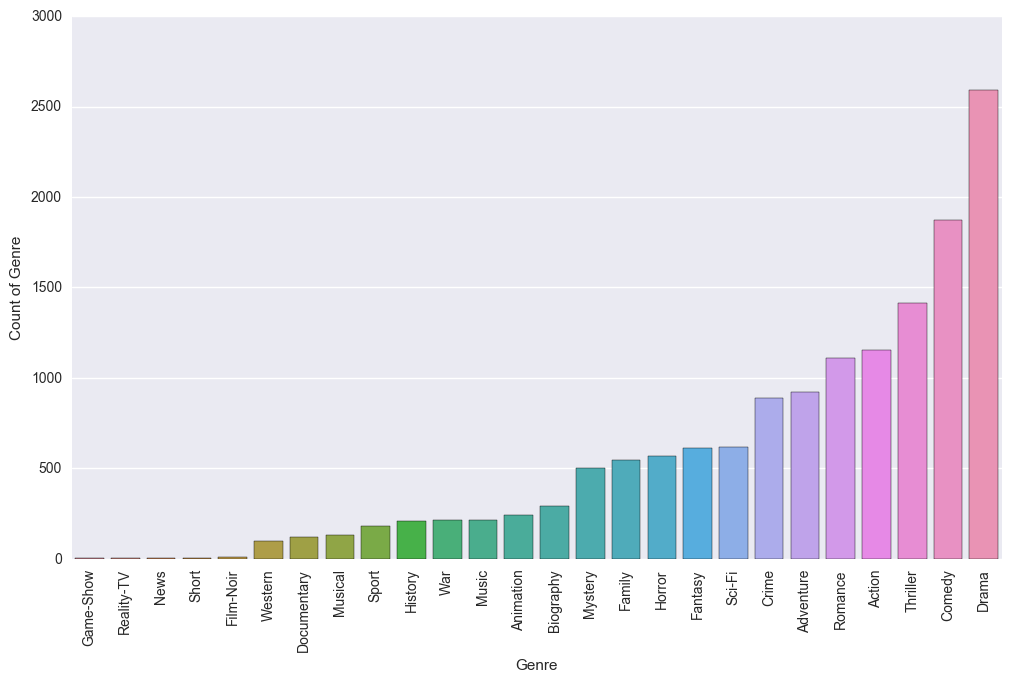

In [55]:
#Now we plot the graphs between genres and which genres are popular
from collections import OrderedDict
from operator import itemgetter
d = OrderedDict(sorted(genre.items(), key=itemgetter(1)))
plt.figure(figsize = (12,7))
ax=sns.barplot(x=d.keys(),y=d.values())
ax = plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre')

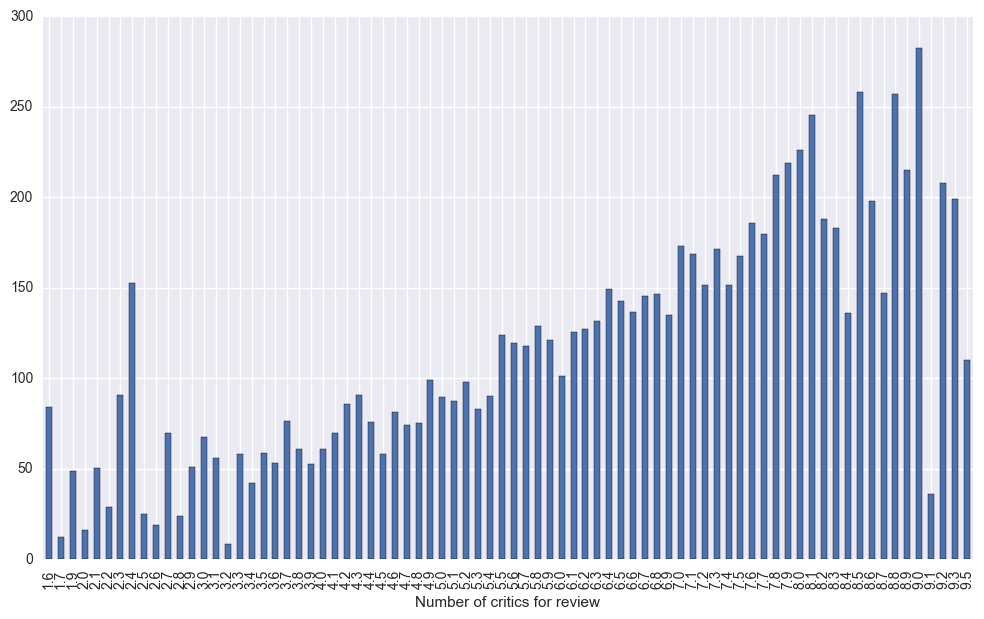

In [56]:
#Number of critics for reviews

data_groupby_likes=data.groupby(['imdb_score'])['num_critic_for_reviews'].mean()
plt.figure(figsize = (12,7))
data_groupby_likes.plot(kind='bar')
plt.xlabel('Number of critics for review')

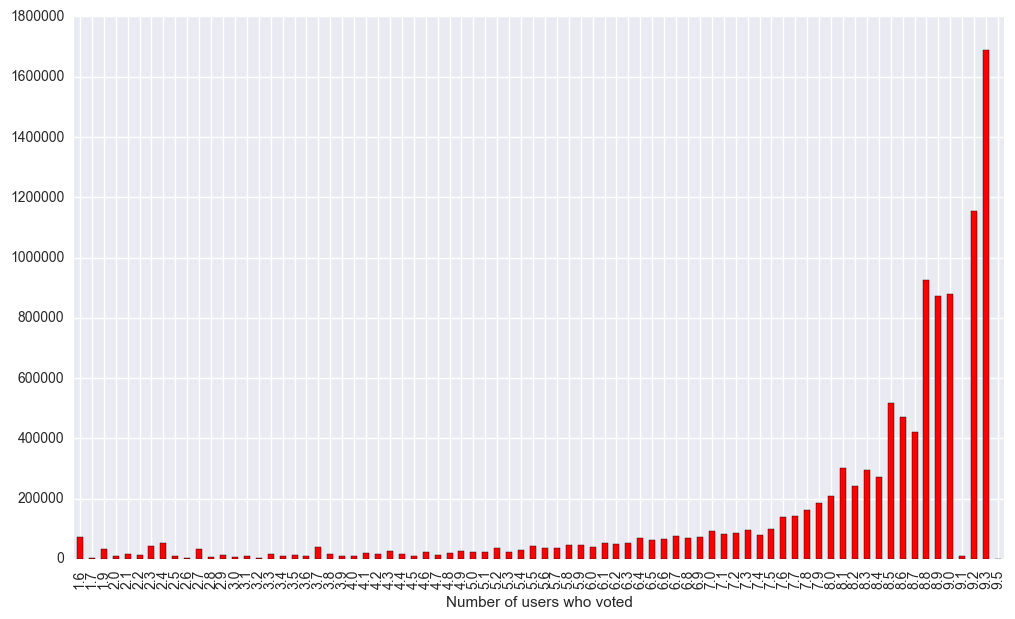

In [57]:
#Number of users who voted

data_groupby_likes=data.groupby(['imdb_score'])['num_voted_users'].mean()
plt.figure(figsize = (12,7))
data_groupby_likes.plot(kind='bar',color='r')
plt.xlabel('Number of users who voted')

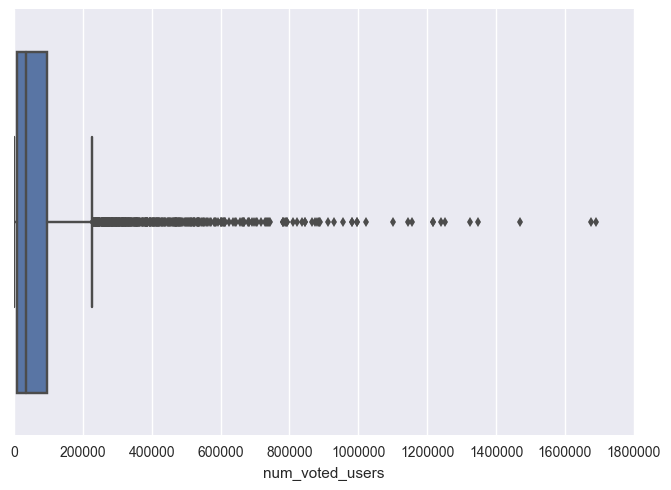

In [58]:
#We see that the number of users who voted increased with the score but for 9.1 there is a dip. This may be an anomaly
#Similarly for the number of critics who reviewed the mean has increased with the score. Lets check the anomaly in the 
#number of users

sns.boxplot(train['num_voted_users'])

In [59]:
train['num_voted_users'][train['num_voted_users']>1400000]=train['num_voted_users'].mean()

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
#Lets first remove the plot keywords column

train.drop('plot_keywords',1,inplace=True)

In [61]:
train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03
mean,139.894904,107.188578,961.068610,645.479477,6581.478683,4.846841e+07,8.275935e+04,9699.063851,1.370216,272.284553,3.975262e+07,2002.610351,1675.852667,6.442138,2.228858,7525.964505,8.715787e+06,2.819262e+03
std,121.034214,25.160972,3366.338095,1661.254189,15021.333920,6.216318e+07,1.333512e+05,18163.799124,2.011066,377.269873,1.958004e+08,12.376429,4064.962256,1.125116,1.339542,19320.445110,1.993308e+08,5.620328e+04
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10,-9.999820e+01
25%,50.000000,93.000000,7.000000,134.500000,615.500000,8.460992e+06,8.593500e+03,1411.000000,0.000000,65.000000,7.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,-9.770136e+06,-5.143542e+01
50%,110.000000,103.000000,52.000000,374.000000,989.000000,3.743230e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.300000e+07,2006.000000,596.000000,6.600000,2.350000,166.000000,6.012734e+06,2.192506e+01
75%,194.000000,118.000000,218.000000,638.000000,11000.000000,5.135707e+07,9.597800e+04,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,919.000000,7.200000,2.350000,3000.000000,3.660000e+07,1.975911e+02
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.347461e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,5.235058e+08,3.461929e+06


In [62]:
#We need to normalize the data first. However before that lets convert the categorical variables to numerical variables.

data_objects=train.select_dtypes(['object'])
lb=LabelEncoder()

for obj in data_objects:
    x=lb.fit_transform(train[obj])
    train.drop(obj,1,inplace=True)
    train[obj]=x

In [63]:
train.drop('movie_imdb_link',1,inplace=True)

In [64]:
#Now lets analyze the data's variations

train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,...,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.894904,107.188578,961.068610,645.479477,6581.478683,4.846841e+07,8.275935e+04,9699.063851,1.370216,272.284553,...,0.958556,1260.348404,1513.353163,559.331549,1040.328773,2457.559191,1771.603014,11.688082,55.871307,7.753718
std,121.034214,25.160972,3366.338095,1661.254189,15021.333920,6.216318e+07,1.333512e+05,18163.799124,2.011066,377.269873,...,0.199334,702.624937,881.111107,258.377474,602.288178,1419.027464,1024.104611,3.874682,15.217969,2.128653
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,134.500000,615.500000,8.460992e+06,8.593500e+03,1411.000000,0.000000,65.000000,...,1.000000,659.000000,746.000000,322.500000,506.000000,1228.500000,875.500000,11.000000,62.000000,7.000000
50%,110.000000,103.000000,52.000000,374.000000,989.000000,3.743230e+07,3.435900e+04,3090.000000,1.000000,156.000000,...,1.000000,1283.000000,1508.000000,616.000000,1026.000000,2459.000000,1773.000000,11.000000,62.000000,9.000000
75%,194.000000,118.000000,218.000000,638.000000,11000.000000,5.135707e+07,9.597800e+04,13756.500000,2.000000,324.000000,...,1.000000,1901.000000,2274.500000,767.000000,1560.500000,3690.500000,2668.500000,11.000000,62.000000,9.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.347461e+06,656730.000000,43.000000,5060.000000,...,1.000000,2397.000000,3031.000000,913.000000,2096.000000,4916.000000,3520.000000,46.000000,64.000000,17.000000


In [65]:
train.drop('movie_categories',1,inplace=True)
train_labels=train['imdb_score']

In [66]:
#Normalizing the data is important.

scaler=StandardScaler(with_mean=True,with_std=True)
scaled_features=scaler.fit_transform(train)
scaled_data=pd.DataFrame(scaled_features,index=train.index,columns=train.columns)

In [67]:
scaled_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating
count,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,...,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03,5.043000e+03
mean,-2.732518e-16,7.460047e-16,-7.159100e-16,1.942835e-16,-1.691632e-15,-2.135908e-16,7.721807e-16,-8.585901e-18,2.163427e-16,2.162987e-17,...,5.245303e-15,-5.677702e-17,-2.104646e-17,6.349824e-16,-1.495323e-16,-1.309521e-16,-4.264056e-18,2.286888e-15,5.674554e-15,4.668088e-15
std,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,...,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00
min,-1.147681e+00,-3.982299e+00,-2.855221e-01,-3.885880e-01,-4.381855e-01,-7.797711e-01,-6.206359e-01,-5.340307e-01,-6.814056e-01,-7.191442e-01,...,-4.809281e+00,-1.793949e+00,-1.717721e+00,-2.164999e+00,-1.727465e+00,-1.732033e+00,-1.730076e+00,-3.016826e+00,-3.671768e+00,-3.642909e+00
25%,-7.427967e-01,-5.639681e-01,-2.834425e-01,-3.076171e-01,-3.972064e-01,-6.436508e-01,-5.562244e-01,-4.563410e-01,-6.814056e-01,-5.494876e-01,...,2.079313e-01,-8.559446e-01,-8.709790e-01,-9.167016e-01,-8.872526e-01,-8.662137e-01,-8.750980e-01,-1.776019e-01,4.027674e-01,-3.541173e-01
50%,-2.470200e-01,-1.664877e-01,-2.700735e-01,-1.634346e-01,-3.723393e-01,-1.775521e-01,-3.629899e-01,-3.638952e-01,-1.841077e-01,-3.082570e-01,...,2.079313e-01,3.224173e-02,-6.076071e-03,2.193460e-01,-2.379292e-02,1.015450e-03,1.364240e-03,-1.776019e-01,4.027674e-01,5.855373e-01
75%,4.470675e-01,4.297328e-01,-2.207569e-01,-4.502754e-03,2.941789e-01,4.647356e-02,9.913639e-02,2.234025e-01,3.131902e-01,1.370917e-01,...,2.079313e-01,9.118878e-01,8.639345e-01,8.038202e-01,8.637440e-01,8.689494e-01,8.758733e-01,-1.776019e-01,4.027674e-01,5.855373e-01
max,5.561831e+00,1.605071e+01,6.547505e+00,1.345775e+01,4.217211e+01,1.145546e+01,9.484930e+00,3.562554e+01,2.070240e+01,1.269168e+01,...,2.079313e-01,1.617882e+00,1.722595e+00,1.368941e+00,1.752941e+00,1.732655e+00,1.707414e+00,8.856293e+00,5.342040e-01,4.344156e+00


In [68]:
scaled_data['imdb_score']=train['imdb_score']

In [69]:
scaled_data.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating
0,4.818166,2.814615,-0.285522,0.126134,-0.371607,11.455463,6.025624,-0.267871,-0.681406,7.374009,...,0.207931,-0.481597,-0.122986,-1.754706,-1.289093,-1.452941,1.626359,-0.177602,0.402767,-0.354117


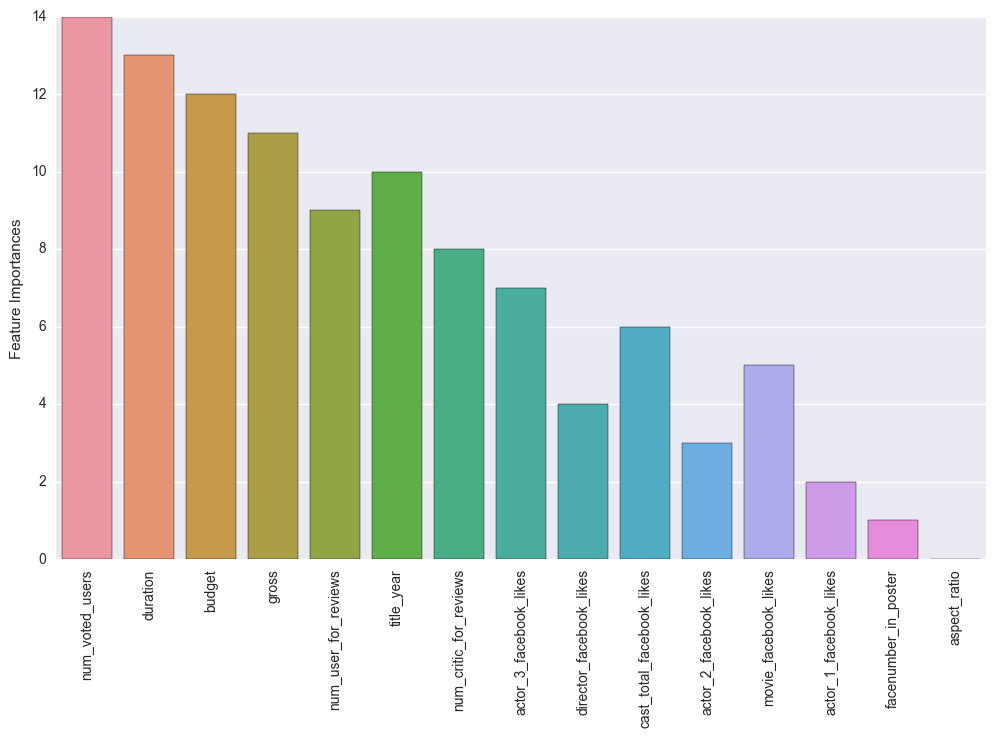

In [70]:
forest=RandomForestRegressor(n_estimators=100,n_jobs=-1)
forest.fit(scaled_data.drop('imdb_score',1),scaled_data['imdb_score'])
importances_=forest.feature_importances_
indices_=np.argsort(importances)[::-1]
feature_=scaled_data.drop('imdb_score',1).columns
plt.figure(figsize = (12,7))
ax=sns.barplot(x=importances_[indices_],y=range(len(indices_)))
ax = plt.xticks(range(len(indices_)),feature_[indices_],rotation=90)
plt.ylabel('Feature Importances')

In [71]:
#Lets break the data into testing and training sets

train_,TEST=train_test_split(scaled_data,train_size=0.9)
TRAIN,VAL=train_test_split(train_,train_size=0.8)
X_TRAIN,Y_TRAIN=TRAIN.drop('imdb_score',1),TRAIN['imdb_score']
X_VAL,Y_VAL=VAL.drop('imdb_score',1),VAL['imdb_score']
X_TEST,Y_TEST=TEST.drop('imdb_score',1),TEST['imdb_score']

In [72]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression(fit_intercept=True)
lr.fit(X_TRAIN,Y_TRAIN)
y_val_pred=lr.predict(X_VAL)
rmse_val=np.sqrt(mean_squared_error(y_val_pred,Y_VAL))

y_test_pred=lr.predict(X_TEST)
rmse_test=np.sqrt(mean_squared_error(y_test_pred,Y_TEST))

'Validation RMSE= '+str(rmse_val)+'     '+'Test RMSE= '+str(rmse_test)+'    '+'Score= '+str(lr.score(X_TEST,Y_TEST))

'Validation RMSE= 0.931721365946     Test RMSE= 0.860162844715    Score= 0.342562137403'

In [73]:
#Random Forest

forest=RandomForestRegressor(n_estimators=100)
forest.fit(X_TRAIN,Y_TRAIN)
y_val_pred2=forest.predict(X_VAL)
rmse_val2=np.sqrt(mean_squared_error(y_val_pred2,Y_VAL))

y_test_pred2=forest.predict(X_TEST)
rmse_test2=np.sqrt(mean_squared_error(y_test_pred2,Y_TEST))

'Validation RMSE= '+str(rmse_val2)+'     '+'Test RMSE= '+str(rmse_test2)+'    '+'Score= '+str(forest.score(X_TEST,Y_TEST))

'Validation RMSE= 0.804999558103     Test RMSE= 0.698594128544    Score= 0.566346140028'

In [87]:
#XGBoost Model

xgb_model=xgb.XGBRegressor(n_estimators=300)
xgb_model.fit(X_TRAIN,Y_TRAIN)
y_val_pred3=xgb_model.predict(X_VAL)
rmse_val3=np.sqrt(mean_squared_error(y_val_pred3,Y_VAL))

y_test_pred3=xgb_model.predict(X_TEST)
rmse_test3=np.sqrt(mean_squared_error(y_test_pred3,Y_TEST))

'Validation RMSE= '+str(rmse_val3)+'     '+'Test RMSE= '+str(rmse_test3)+'    '+'Score= '+str(xgb_model.score(X_TEST,Y_TEST))

'Validation RMSE= 0.738404914705     Test RMSE= 0.645808076596    Score= 0.629404366357'